### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [68]:
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [69]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [70]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [72]:
from textblob import TextBlob

In [73]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        result='Positive'
    elif sentiment<0:
        result='Negative'
    else:
        result='Neutral'
    return result
            

In [74]:
get_sentiment('I love Chess')

'Positive'

In [75]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [76]:
df.sample(3)

,Emotion,Text,Sentiment
22857,neutral,Of course . Because the TV stations need to m...,Neutral
14297,fear,its not a ... its a and its coming your way....,Neutral
12842,fear,bulls need to complete signandtrade for crawfo...,Positive


<AxesSubplot:xlabel='Emotion', ylabel='count'>

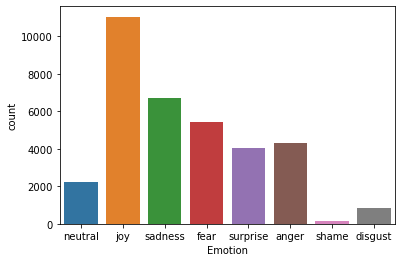

In [77]:
sns.countplot(x='Emotion',data=df)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


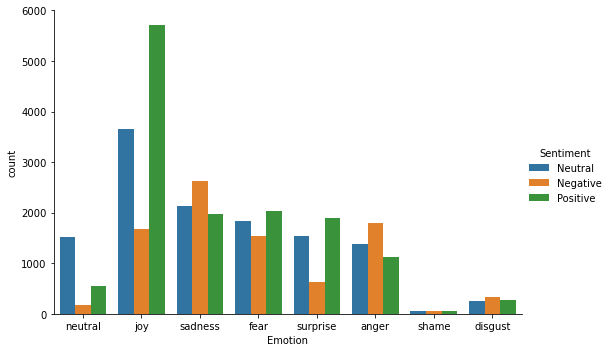

In [78]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=5,aspect=1.5)

In [79]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [80]:

df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [81]:

df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [82]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [83]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_emojis)

In [84]:
df

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,Positive,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,Positive,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,Neutral,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Neutral,Youu JEALOUSY #Losing YOU


In [85]:
from collections import Counter

In [86]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [87]:
emotion_list=df['Emotion'].unique().tolist()

In [88]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [89]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [90]:
joy_docx=' '.join(joy_list)

In [99]:
#joy_docx

In [92]:
keyword_joy=extract_keywords(joy_docx)

In [93]:
keyword_joy

{'day': 731,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 472,
 'tomorrow': 468,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 258,
 'life': 251,
 'hours': 251,
 'week': 232,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'RT': 160,
 'feeling': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [94]:
df[df['Emotion']=='anger']

,Emotion,Text,Sentiment,Clean_Text
10,anger,The bull tossed the effigy out of their hands ...,Positive,bull tossed effigy hands infuriated
14,anger,"With everything , with everybody , with all t...",Neutral,everybody
23,anger,I have to talk to you !,Neutral,talk
41,anger,When you kill yourself with work and see the n...,Neutral,kill work number slakers wandering around nothing
44,anger,My parents didn't allow me to go to a social f...,Positive,parents allow social function friends attending
...,...,...,...,...
34762,anger,letting Explosions in the Sky express your pen...,Negative,letting Explosions Sky express pentup emotions...
34763,anger,"` You 're angry I 'm here , are n't you ? """,Negative,re angry m nt
34775,anger,Iv used my monthly allowance of Internet data ...,Negative,Iv monthly allowance Internet data apparently ...
34779,anger,Love when i dont beat my highscore in doodleju...,Positive,Love dont beat highscore doodlejump throw phon...


In [102]:
def most_common_words(mydict,emotion_name):
    df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title('Plot of {} Most Common Keywords'.format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show

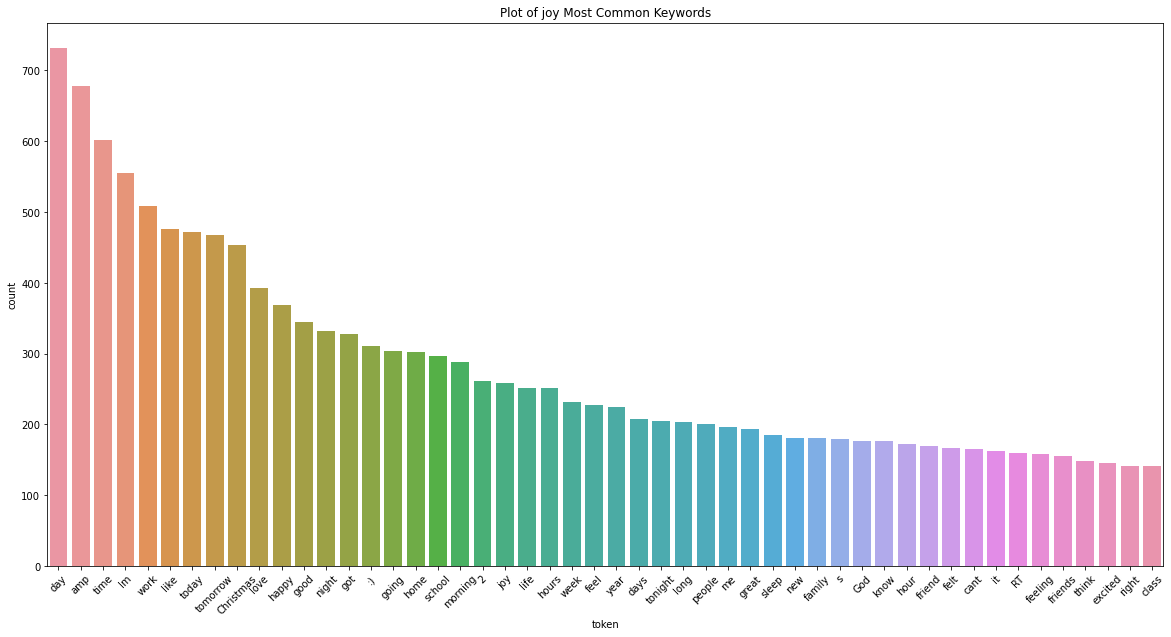

In [103]:
most_common_words(keyword_joy,'joy')

In [104]:
from wordcloud import WordCloud

In [105]:
def wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

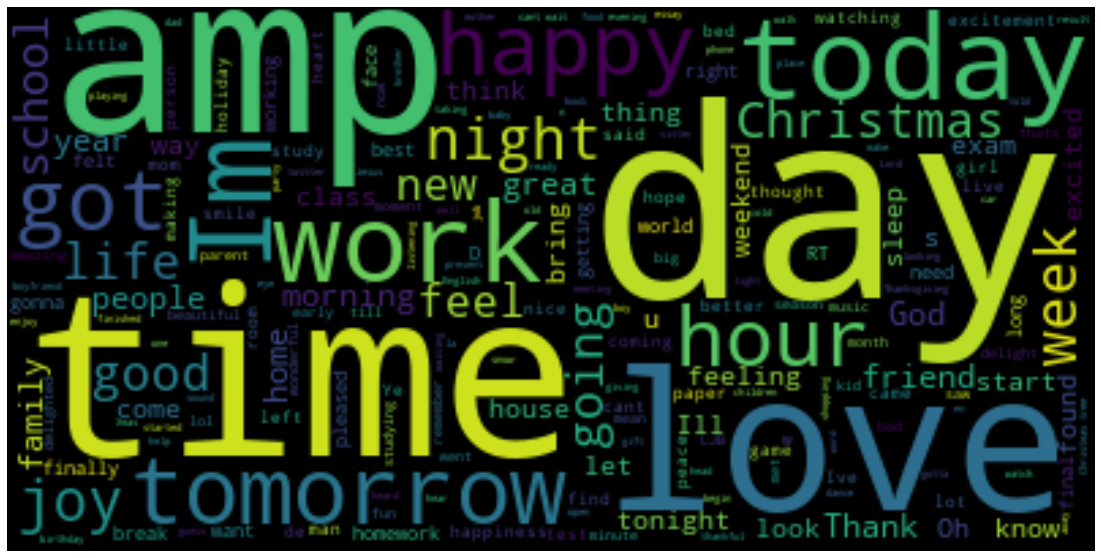

In [106]:
wordcloud(joy_docx)

In [17]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [18]:

x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [19]:

from sklearn.pipeline import Pipeline

In [20]:

pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:

pipe_lr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
pipe_lr.score(x_test,y_test)

0.622341444721211

In [24]:

ex1 = "This book was so interesting it made me happy"

In [25]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [26]:

pipe_lr.predict_proba([ex1])

array([[1.55722458e-03, 6.83959568e-03, 1.18109737e-02, 9.50298397e-01,
        9.97433452e-06, 2.21851783e-02, 5.01818969e-05, 7.24847444e-03]])

In [27]:

pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [107]:

import joblib
pipeline_file = open("emotion_classifier","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()